# Support Vector Machine on Breast Cancer Data

## Definition

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

source: IBM

### Objective

* Understand the Dataset & cleanup (if required).  
* Use scikit-learn to Support Vector Machine to classify
* Build classification models to predict whether the cancer type is Malignant or Benign
* Evaluate the Model to know its efficiency in making predictions

#### Processes required to achieve the objective

* Data Understanding
* Import necessary libraries
* Data Importation using Pandas to create easily readable dataframe
* Exploration of Data - Checking general data overview using 'describe' amd 'info' 
* Feature Selection
* Data Visualisation
* Use Multicollinearity function to help select features for the Model
* Split Data into Training and Testing
* use sklearn to create the Support Vector Machine Model
* Evaluate the model
* Remarks about observation 

## Understanding the Data

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

Some of the Data description is as below:

* diagnosis: diagnosis of breast cancer tissues (M = malignant, B = benign). Benign: tumors arent cancerous. Malignant: tumors are cancerous
* radius_mean: mean of distances from center to points on the perimeter
* texture_mean: standard deviation of gray-scale values
* perimeter_mean: mean size of the core tumor
* area_mean: mean area of the core tumor
* smoothness_mean: mean of local variation in radius lengths

### Initial Libraries Import

In [2]:
import sklearn
import pandas as pd
import numpy as np

## Data Import

In [3]:
df = pd.read_csv('breast-cancer.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Exploration

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.isnull().values.any()

False

## Feature Selection

In [10]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [13]:
df['diagnosis'].replace(['M', 'B'],
                        [1, 2], inplace=True)

In [14]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
df.corr()['diagnosis']

id                        -0.039769
diagnosis                  1.000000
radius_mean               -0.730029
texture_mean              -0.415185
perimeter_mean            -0.742636
area_mean                 -0.708984
smoothness_mean           -0.358560
compactness_mean          -0.596534
concavity_mean            -0.696360
concave points_mean       -0.776614
symmetry_mean             -0.330499
fractal_dimension_mean     0.012838
radius_se                 -0.567134
texture_se                 0.008303
perimeter_se              -0.556141
area_se                   -0.548236
smoothness_se              0.067016
compactness_se            -0.292999
concavity_se              -0.253730
concave points_se         -0.408042
symmetry_se                0.006522
fractal_dimension_se      -0.077972
radius_worst              -0.776454
texture_worst             -0.456903
perimeter_worst           -0.782914
area_worst                -0.733825
smoothness_worst          -0.421465
compactness_worst         -0

* from the above We can see features that are weakly correlated and those that are strongly correlated to our dependent feature feature 'diagnosis'

* Deciding to choose features that are highly correlated to diagnosis for a threshold of 60% and in addition add texture_mean, texture_wors and smoothness_mean and smoothness worst

In [20]:
df_new = df[['diagnosis','radius_mean','perimeter_mean','area_mean','concavity_mean','concave points_mean','concave points_mean','radius_worst','perimeter_worst','area_worst','concavity_worst','concave points_worst','texture_mean','texture_worst','smoothness_mean','smoothness_worst']]

In [21]:
df_new.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst,texture_mean,texture_worst,smoothness_mean,smoothness_worst
0,1,17.99,122.80,1001.0,0.3001,0.14710,0.14710,25.38,184.60,2019.0,0.7119,0.2654,10.38,17.33,0.11840,0.1622
1,1,20.57,132.90,1326.0,0.0869,0.07017,0.07017,24.99,158.80,1956.0,0.2416,0.1860,17.77,23.41,0.08474,0.1238
2,1,19.69,130.00,1203.0,0.1974,0.12790,0.12790,23.57,152.50,1709.0,0.4504,0.2430,21.25,25.53,0.10960,0.1444
3,1,11.42,77.58,386.1,0.2414,0.10520,0.10520,14.91,98.87,567.7,0.6869,0.2575,20.38,26.50,0.14250,0.2098
4,1,20.29,135.10,1297.0,0.1980,0.10430,0.10430,22.54,152.20,1575.0,0.4000,0.1625,14.34,16.67,0.10030,0.1374


## Data Visualisation

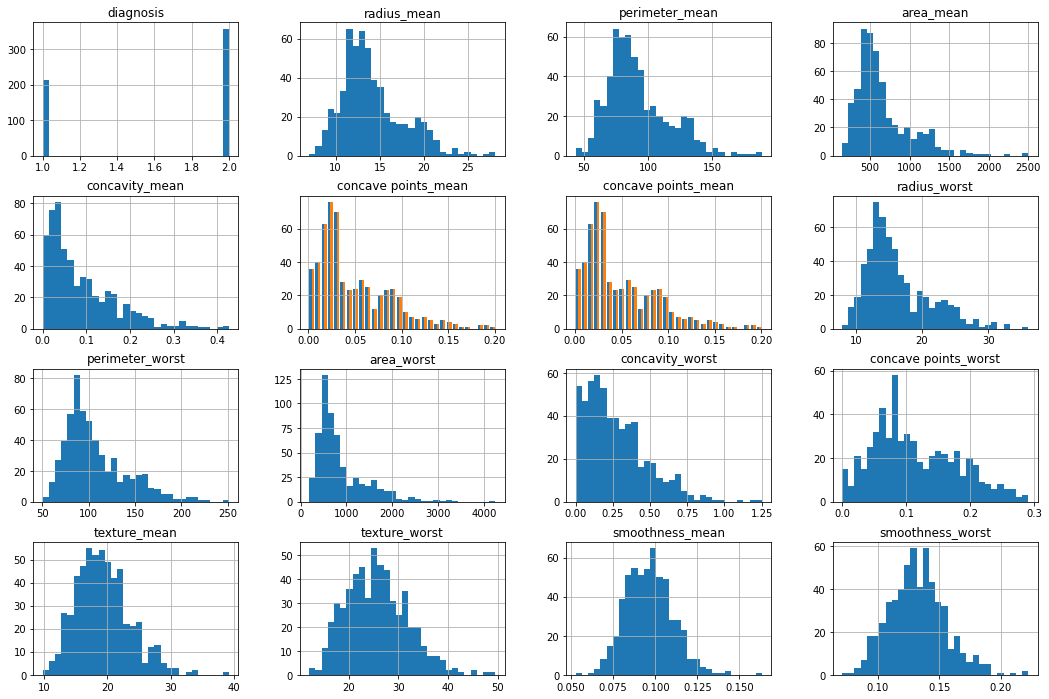

In [42]:
import matplotlib.pyplot as plt
df_new.hist(bins=30, figsize=(18,12))
plt.show()

### Let us visualise the radius feature data against diagnosis

C:\Users\mumun\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


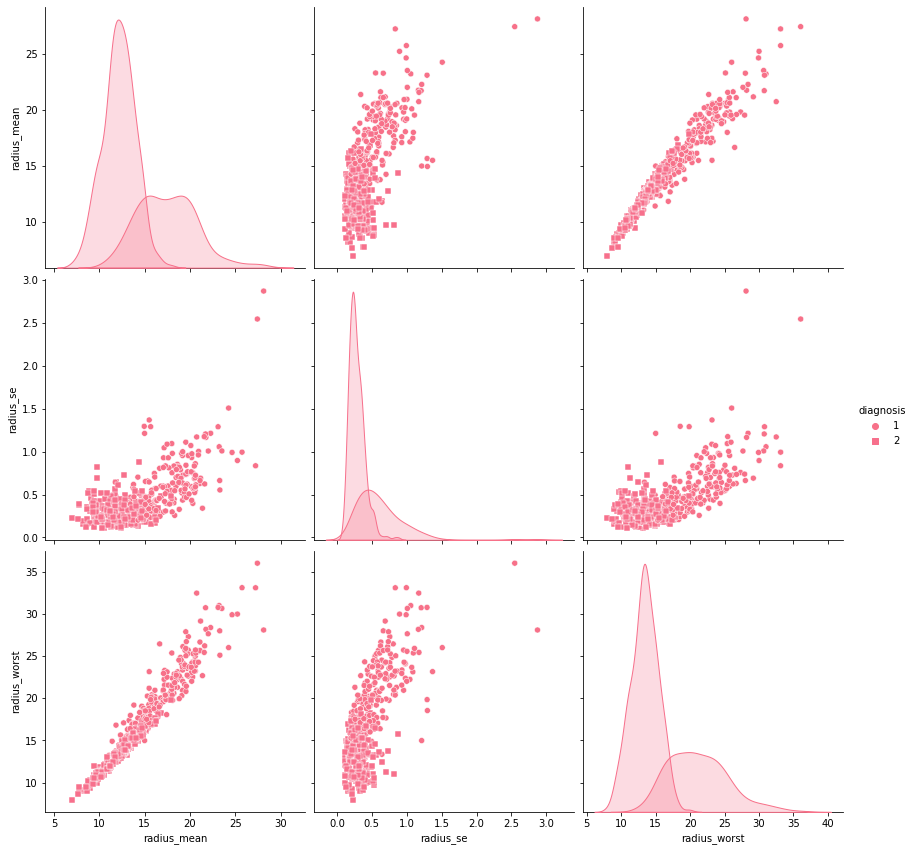

In [44]:
import seaborn as sns

radius = df[['radius_mean','radius_se','radius_worst','diagnosis']]
sns.pairplot(radius, hue='diagnosis',palette="husl", markers=["o", "s"],size=4)

## Checking Multicollinearity in features

In [22]:
X =df_new[['radius_mean','perimeter_mean','area_mean','concavity_mean','concave points_mean','concave points_mean','radius_worst','perimeter_worst','area_worst','concavity_worst','concave points_worst','texture_mean','texture_worst','smoothness_mean','smoothness_worst']]
y =df_new[['diagnosis']]

In [26]:
import statsmodels.api as sm

In [27]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [28]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     119.2
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          9.36e-157
Time:                        11:05:58   Log-Likelihood:                 1.3421
No. Observations:                 569   AIC:                             27.32
Df Residuals:                     554   BIC:                             92.47
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.3467      0.235     14.268      0.000       2.886       3.807
radius_mean             -0.0058      0.121     -0.048      0.962      -0.243       0.232
perimeter_mean           0.0291      0.017      1.729      0.084      -0.004       0.062
area_mean               -0.0013      0.000     -2.970      0.003      -0.002      -0.000
concavity_mean           0.2749      0.740      0.371      0.711      -1.179       1.729
concave points_mean     -1.2914      0.432     -2.992      0.003      -2.139      -0.444
concave points_mean     -1.2914      0.432     -2.992      0.003      -2.139      -0.444
concave points_mean     -1.2914      0.432     -2.992      0.003      -2.139      -0.444
concave points_mean     -1.2914      0.432     -2.992      0.003      -2.139      -0.444
radius_worst            -0.2443      0.044     -5.601      0.000      -0.330      -0.159
perimeter_worst          0.0008      0.004      0.169      0.866      -0.008       0.010
area_worst               0.0014      0.000      5.763      0.000       0.001       0.002
concavity_worst         -0.2514      0.192     -1.312      0.190      -0.628       0.125
concave points_worst    -0.2918      0.673     -0.434      0.665      -1.614       1.030
texture_mean            -0.0107      0.007     -1.607      0.109      -0.024       0.002
texture_worst           -0.0038      0.005     -0.789      0.430      -0.013       0.006
smoothness_mean          1.8997      1.713      1.109      0.268      -1.465       5.264
smoothness_worst        -2.6719      1.040     -2.568      0.010      -4.716      -0.628
==============================================================================
Omnibus:                       26.141   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.506
Skew:                          -0.524   Prob(JB):                     6.46e-07
Kurtosis:                       3.324   Cond. No.                     1.63e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.55e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Further correlation check between features

In [30]:
import matplotlib.pyplot as plb
X.iloc[:,1:].corr()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,concave points_mean,concave points_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst,texture_mean,texture_worst,smoothness_mean,smoothness_worst
radius_mean,1.000000,0.997855,0.987357,0.676764,0.822529,0.822529,0.822529,0.822529,0.969539,0.965137,0.941082,0.526911,0.744214,0.323782,0.297008,0.170581,0.119616
perimeter_mean,0.997855,1.000000,0.986507,0.716136,0.850977,0.850977,0.850977,0.850977,0.969476,0.970387,0.941550,0.563879,0.771241,0.329533,0.303038,0.207278,0.150549
area_mean,0.987357,0.986507,1.000000,0.685983,0.823269,0.823269,0.823269,0.823269,0.962746,0.959120,0.959213,0.512606,0.722017,0.321086,0.287489,0.177028,0.123523
concavity_mean,0.676764,0.716136,0.685983,1.000000,0.921391,0.921391,0.921391,0.921391,0.688236,0.729565,0.675987,0.884103,0.861323,0.302418,0.299879,0.521984,0.448822
concave points_mean,0.822529,0.850977,0.823269,0.921391,1.000000,1.000000,1.000000,1.000000,0.830318,0.855923,0.809630,0.752399,0.910155,0.293464,0.292752,0.553695,0.452753
concave points_mean,0.822529,0.850977,0.823269,0.921391,1.000000,1.000000,1.000000,1.000000,0.830318,0.855923,0.809630,0.752399,0.910155,0.293464,0.292752,0.553695,0.452753
concave points_mean,0.822529,0.850977,0.823269,0.921391,1.000000,1.000000,1.000000,1.000000,0.830318,0.855923,0.809630,0.752399,0.910155,0.293464,0.292752,0.553695,0.452753
concave points_mean,0.822529,0.850977,0.823269,0.921391,1.000000,1.000000,1.000000,1.000000,0.830318,0.855923,0.809630,0.752399,0.910155,0.293464,0.292752,0.553695,0.452753
radius_worst,0.969539,0.969476,0.962746,0.688236,0.830318,0.830318,0.830318,0.830318,1.000000,0.993708,0.984015,0.573975,0.787424,0.352573,0.359921,0.213120,0.216574
perimeter_worst,0.965137,0.970387,0.959120,0.729565,0.855923,0.855923,0.855923,0.855923,0.993708,1.000000,0.977578,0.618344,0.816322,0.358040,0.365098,0.238853,0.236775


## Split Data into Training and Testing

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

## Model Creation

In [32]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

C:\Users\mumun\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

## Prediction

In [35]:
y_pred = svm.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.956140350877193


## Remarks

* Our model performed very well with a 95.6% accuracy score an indication of a good feature selection process
* There were sure some multicollinearity issues in the features. Meaning some features could have been dropped and there would not be significant change in our model performance